# Worksheet 14

Name:  Daniel Scrivener
UID: U38208685

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please raise your hand in class when you have a prediction.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

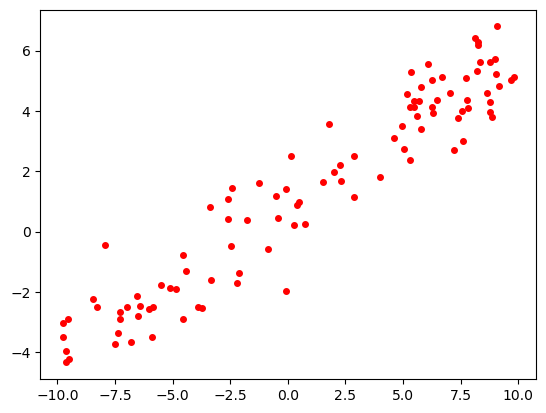

In [1]:
import numpy as np
import matplotlib.pyplot as plt

line = np.array([ 1 , 0.5 ])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = line[0]+(line[1]*xlin)+np.random.randn(100)
plt.plot(xlin,ylin,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

[0.87894807 0.49720868]
Difference (absolute):  [0.12105193 0.00279132]
Differentce (percent):  [12.10519317  0.55826327]


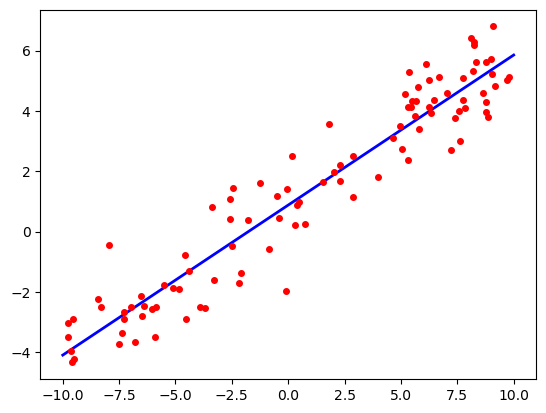

In [7]:
intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T
beta = np.linalg.inv((X.T @ X)) @ X.T @ ylin

print(beta)
dif = line - beta
print("Difference (absolute): ", dif)
print("Differentce (percent): ", (dif/line) * 100)

xplot = np.linspace(-10,10,50)
yestplot = beta[0] + beta[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(xlin, ylin,'ro',markersize=4)
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

The line's intercept is off by 0.12 units (a 12% difference from the original parameter), whereas the slope is off by a lesser percentage (0.003 units, or a 0.6% difference from the original parameter).

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

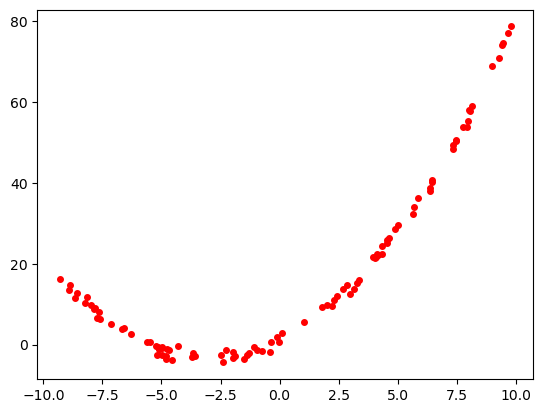

In [14]:
import numpy as np
import matplotlib.pyplot as plt

line = np.array([ 1 , 3, 0.5 ])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = line[0]+(line[1]*xlin)+(line[2]*(xlin**2))+np.random.randn(100)
plt.plot(xlin,ylin,'ro',markersize=4)
plt.show()

e) Plot the least squares estimate line through the scatter plot.

[1.17123527 2.9607243  0.49750716]
Difference (absolute):  [-0.17123527  0.0392757   0.00249284]
Differentce (percent):  [-17.12352662   1.30919015   0.49856892]


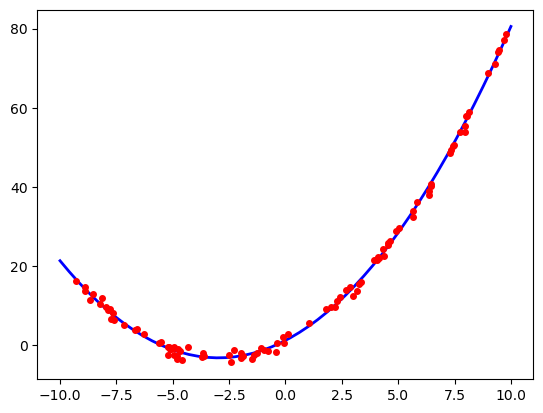

In [15]:
intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin, xlin**2]).T
beta = np.linalg.inv((X.T @ X)) @ X.T @ ylin

print(beta)
dif = line - beta
print("Difference (absolute): ", dif)
print("Differentce (percent): ", (dif/line) * 100)

xplot = np.linspace(-10,10,50)
yestplot = beta[0] + beta[1] * xplot + beta[2] * (xplot**2)
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(xlin, ylin,'ro',markersize=4)
plt.show()

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

The line's intercept is off by -0.17 units (a 17% difference from the original parameter). The linear coefficient is off by a lesser percentage (0.04 units, or 1.3%) and the quadratic coefficient is most accurate at only 0.002 units off (0.5% difference).

g) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 4 * log(X) + eps`.

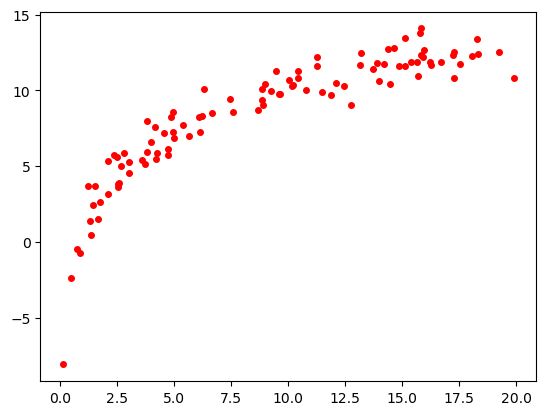

In [20]:
import numpy as np
import matplotlib.pyplot as plt

line = np.array([ 1 , 4 ])
xlin = 20.0 * np.random.random(100)
ylin = line[0]+(line[1]*np.log(xlin))+np.random.randn(100)
plt.plot(xlin,ylin,'ro',markersize=4)
plt.show()

h) Plot the least squares estimate line through the scatter plot.

[0.7514161  4.08673682]
Difference (absolute):  [ 0.2485839  -0.08673682]
Differentce (percent):  [24.8583899  -2.16842052]


/var/folders/yg/zpnh1p_d4qvg_bz_487cbyp00000gn/T/ipykernel_14281/438270860.py:11: RuntimeWarning: divide by zero encountered in log
  yestplot = beta[0] + beta[1] * np.log(xplot)


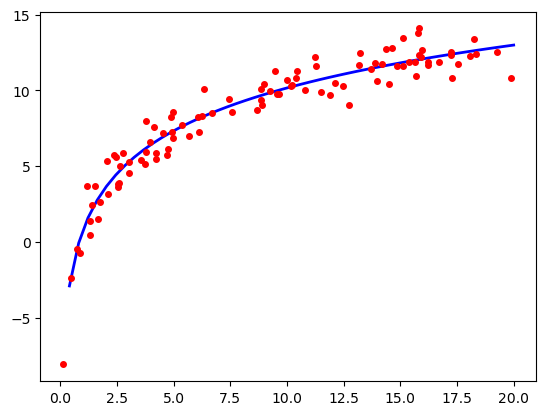

In [22]:
intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, np.log(xlin)]).T
beta = np.linalg.inv((X.T @ X)) @ X.T @ ylin

print(beta)
dif = line - beta
print("Difference (absolute): ", dif)
print("Differentce (percent): ", (dif/line) * 100)

xplot = np.linspace(0,20,50)
yestplot = beta[0] + beta[1] * np.log(xplot)
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(xlin, ylin,'ro',markersize=4)
plt.show()

i) How does the estimate of `beta` compare to the parameters we used to generate the data?

The line's intercept is off by 0.25 units (a 25% difference from the original parameter), whereas the logarithmic coefficient is off by a lesser percentage (-0.09 units, or a 2.17% difference from the original parameter).

j) Using the `statsmodels` library, fill out the code below to generate a surface that cuts through the 3D scatter plot.

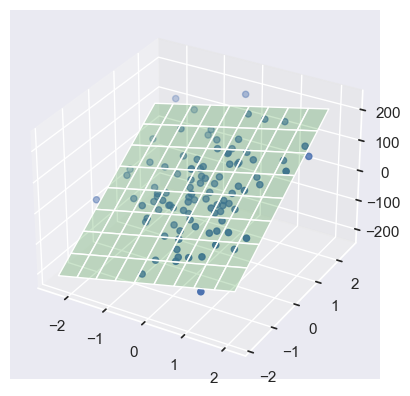

: 

In [31]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import statsmodels.api as sm

import seaborn as sns; sns.set()

X, y = datasets.make_regression(n_samples=100, n_features=2, n_informative=5, noise=30, random_state=1)
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

x1, x2 = np.meshgrid(np.arange(min(X.T[1]), max(X.T[1]), .5), np.arange(min(X.T[2]), max(X.T[2]), .5))
exog = pd.core.frame.DataFrame({'x0': np.ones(len(x1.ravel())).ravel(), 'x1': x1.ravel(), 'x2':x2.ravel()})

out = model.predict(exog)

ax = plt.axes(projection='3d')
ax.scatter3D(X.T[1], X.T[2], y)
ax.plot_surface(x1, x2, out.values.reshape(x1.shape), color='Green', alpha=.2)
plt.show()